This file using models to classify or predict which loans will default.

In [180]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from matplotlib import rcParams
%pylab inline  
# googled solution to pylab not found error

# Import estimators
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Import model metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix as cm
from sklearn.model_selection import cross_val_score

# Import cross validation
from sklearn.cross_validation import train_test_split

# Set default matplot figure size
pylab.rcParams['figure.figsize'] = (10.0,8.0)

Populating the interactive namespace from numpy and matplotlib


C:\Users\Christy McCanless\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['cm', 'long', 'table']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
#NOTES DURING CODING:

"""# Rearrange columns UID and DEPVAR
columnsNames = list(rawData.columns)
UID = columnsNames.index('UID')
DEPVAR = columnsNames.index('DEPVAR')
columnsNames[UID], columnsNames[DEPVAR] = columnsNames[DEPVAR], columnsNames[UID]
rawData = rawData[columnsNames]
rawData.iloc[0:5, 520:]"""

"""Remove features
 df.drop(['B', 'C'], axis=1)"""

"""Rename feature
 rawData.rename(columns = {'default payment next month':'default'}, inplace=True)"""


"""Find columns with only values of 100"""
"""Number of observations per building
BLDG_0.shape, BLDG_2.shape, BLDG_1.shape

BLDG_0.shape[0]

Find WAP columns with all 100 readings ie no reading
BLDG = BLDG_0[0:520]
sig_0 = BLDG.sum(axis = 0) == ((BLDG.shape[0])*100)
sig_0[0:10], len(sig_0), len(BLDG)

use_0 = sig_0[sig_0 == False]
len(use_0)

use_0[0:10], type(use_0)
B0 = BLDG_0[BLDG_0[:,[use_0]]]

BLDG_0_NOSIG = BLDG_0[BLDG_0.sum(axis = 0) == (5249*100)]
BLDG_0_NOSIG.shape"""


In [ ]:
pwd

In [2]:
# Import raw data
rawData = pd.read_csv('trainingData.csv')

In [3]:
# Examine structure of raw data set
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 529 entries, WAP001 to TIMESTAMP
dtypes: float64(2), int64(527)
memory usage: 80.5 MB


In [4]:
rawData.describe().iloc[:,519:]

,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,19937.0,19937.000000,1.993700e+04,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,1.993700e+04
mean,100.0,-7464.275947,4.864871e+06,1.674575,1.212820,148.429954,1.833024,9.068014,13.021869,1.371421e+09
std,0.0,123.402010,6.693318e+01,1.223078,0.833139,58.342106,0.372964,4.988720,5.362410,5.572054e+05
min,100.0,-7691.338400,4.864746e+06,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.369909e+09
25%,100.0,-7594.737000,4.864821e+06,1.000000,0.000000,110.000000,2.000000,5.000000,8.000000,1.371056e+09
50%,100.0,-7423.060900,4.864852e+06,2.000000,1.000000,129.000000,2.000000,11.000000,13.000000,1.371716e+09
75%,100.0,-7359.193000,4.864930e+06,3.000000,2.000000,207.000000,2.000000,13.000000,14.000000,1.371721e+09
max,100.0,-7300.818990,4.865017e+06,4.000000,2.000000,254.000000,2.000000,18.000000,24.000000,1.371738e+09


In [5]:
print('Summary of rawData first 6 rows:')
rawData.iloc[0:5,0:529]

Summary of rawData first 6 rows:


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [6]:
print('Summary of rawData first 6 rows, last 10 columns:')
rawData.iloc[0:5,519:529]

Summary of rawData first 6 rows, last 10 columns:


,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [7]:
# Remove features
rawData.drop(['RELATIVEPOSITION','USERID','PHONEID', 'TIMESTAMP'], axis = 1, inplace = True)
rawData.iloc[0:5, 519:]
#rawData.rename(columns = {'default payment next month':'default'}, inplace=True)

,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID
0,100,-7541.2643,4.864921e+06,2,1,106
1,100,-7536.6212,4.864934e+06,2,1,106
2,100,-7519.1524,4.864950e+06,2,1,103
3,100,-7524.5704,4.864934e+06,2,1,102
4,100,-7632.1436,4.864982e+06,0,0,122


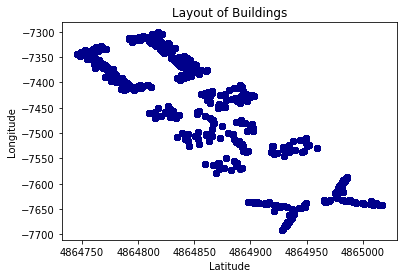

In [8]:
# Visualizing layout of buildings
lat = rawData['LATITUDE']
long = rawData['LONGITUDE']
plt.scatter(lat, long, color = 'darkblue')  # Real values
plt.title('Layout of Buildings')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

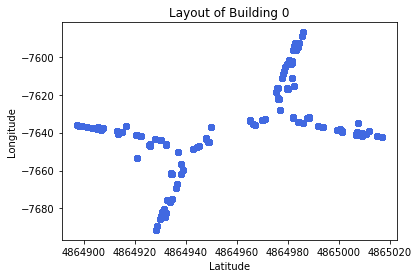

In [9]:
# Visualizing layout of buildings
lat = rawData['LATITUDE'][rawData['BUILDINGID'] == 0]
long = rawData['LONGITUDE'][rawData['BUILDINGID'] == 0]
plt.scatter(lat, long, color = 'royalblue')  # Real values
plt.title('Layout of Building 0')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

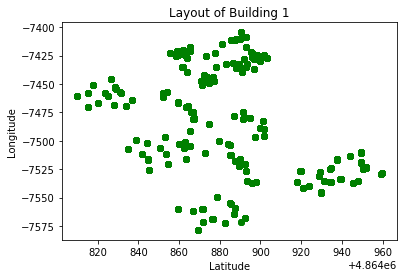

In [10]:
# Visualizing layout of buildings
lat = rawData['LATITUDE'][rawData['BUILDINGID'] == 1]
long = rawData['LONGITUDE'][rawData['BUILDINGID'] == 1]
plt.scatter(lat, long, color = 'green')  # Real values
plt.title('Layout of Building 1')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

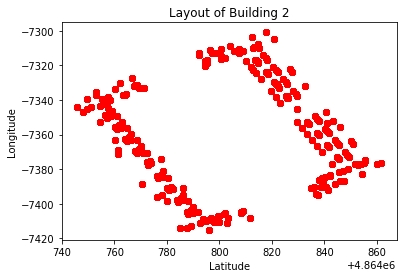

In [11]:
# Visualizing layout of buildings
lat = rawData['LATITUDE'][rawData['BUILDINGID'] == 2]
long = rawData['LONGITUDE'][rawData['BUILDINGID'] == 2]
plt.scatter(lat, long, color = 'red')  # Real values
plt.title('Layout of Building 2')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [12]:
rawData.drop(['LONGITUDE', 'LATITUDE'], axis = 1, inplace = True)

In [13]:
cols = rawData.columns[520:529]
cols

Index(['FLOOR', 'BUILDINGID', 'SPACEID'], dtype='object')

In [14]:
# Number of buildings in data set
rawData.groupby('BUILDINGID')['BUILDINGID'].count()

BUILDINGID
0    5249
1    5196
2    9492
Name: BUILDINGID, dtype: int64

In [15]:
5249+5196+9492

19937

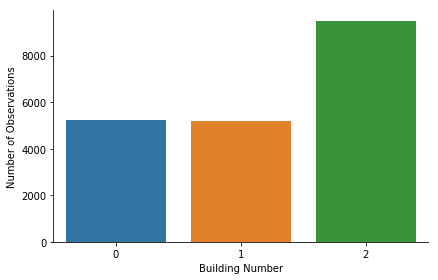

In [155]:
# Instead of a group by, use seaborn to plot the count of observations in each building
fg = sns.factorplot('BUILDINGID', data=rawData, kind='count', aspect=1.5)
fg.set_xlabels('Building Number')
fg.set_ylabels('Number of Observations')

In [17]:
rawData.groupby('FLOOR')['FLOOR'].count()

FLOOR
0    4369
1    5002
2    4416
3    5048
4    1102
Name: FLOOR, dtype: int64

In [18]:
# Number of observations in each floor of each building
rawData.groupby(['BUILDINGID','FLOOR'])['FLOOR'].count()

BUILDINGID  FLOOR
0           0        1059
            1        1356
            2        1443
            3        1391
1           0        1368
            1        1484
            2        1396
            3         948
2           0        1942
            1        2162
            2        1577
            3        2709
            4        1102
Name: FLOOR, dtype: int64

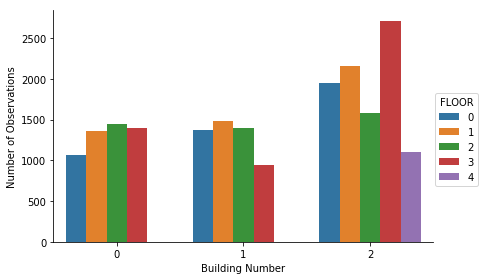

In [154]:
# Again use saeborn to group by Sex and class
g = sns.factorplot('BUILDINGID', data = rawData, hue = 'FLOOR', kind = 'count', aspect = 1.5)
g.set_xlabels('Building Number')
g.set_ylabels('Number of Observations')

In [20]:
cols

Index(['FLOOR', 'BUILDINGID', 'SPACEID'], dtype='object')

In [21]:
# Table showing default in limit balance groups and education levels
table = pd.crosstab(index=[rawData.BUILDINGID], columns=[rawData.SPACEID])
table

SPACEID,1,2,3,4,5,6,7,8,9,10,...,243,244,245,246,247,248,249,250,253,254
BUILDINGID,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,65,80,97,95,60,79,38,56,60,89,...,19,50,20,20,70,90,30,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,30,20,20,20,30,20,0,20,20,10


# Separate Dataset by building

In [22]:
# Create variable for each building

BLDG_0 = rawData[rawData['BUILDINGID'] == 0]
BLDG_1 = rawData[rawData['BUILDINGID'] == 1]
BLDG_2 = rawData[rawData['BUILDINGID'] == 2]

In [23]:
BLDG_0.iloc[0:5, 519:], BLDG_0.shape

(      WAP520  FLOOR  BUILDINGID  SPACEID
 4        100      0           0      122
 7119     100      0           0      102
 7120     100      0           0      110
 7121     100      0           0      111
 7122     100      0           0      107, (5249, 523))

In [24]:
# Create unique variable combining Floor, Building and SpaceID

BLDG_0['UID'] = BLDG_0['FLOOR'].astype('str') + '_' + BLDG_0['SPACEID'].astype('str')
BLDG_1['UID'] = BLDG_1['FLOOR'].astype('str') + '_' + BLDG_1['SPACEID'].astype('str')
BLDG_2['UID'] = BLDG_2['FLOOR'].astype('str') + '_' + BLDG_2['SPACEID'].astype('str')

BLDG_0.iloc[0:5, 520:]

C:\Users\Christy McCanless\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Christy McCanless\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Christy McCanless\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

,FLOOR,BUILDINGID,SPACEID,UID
4,0,0,122,0_122
7119,0,0,102,0_102
7120,0,0,110,0_110
7121,0,0,111,0_111
7122,0,0,107,0_107


In [25]:
BLDG_0.shape

(5249, 524)

In [26]:
# Set dependent variable
print('Summary of dependent variable sample for Building 0:')
depVar_0 = BLDG_0['UID']
depVar_0[0:5,]

Summary of dependent variable sample for Building 0:


4       0_122
7119    0_102
7120    0_110
7121    0_111
7122    0_107
Name: UID, dtype: object

In [27]:
# Set dependent variable
print('Summary of dependent variable sample for Building 1:')
depVar_1 = BLDG_1['UID']
depVar_1[0:5,]

Summary of dependent variable sample for Building 1:


0    2_106
1    2_106
2    2_103
3    2_102
5    2_105
Name: UID, dtype: object

In [28]:
# Set dependent variable
print('Summary of dependent variable sample for Building 2:')
depVar_2 = BLDG_2['UID']
depVar_2[0:5,]

Summary of dependent variable sample for Building 2:


46    3_247
47    3_248
49    3_247
50    3_246
51    3_245
Name: UID, dtype: object

In [29]:
# Change depVar to labels - BLDG 0
labelencoder_depVar_0 = LabelEncoder()
depVar_0 = labelencoder_depVar_0.fit_transform(depVar_0)
depVar_0

array([ 15,   0,   3, ..., 254, 251, 250], dtype=int64)

In [30]:
# Change depVar to labels - BLDG 1
labelencoder_depVar_1 = LabelEncoder()
depVar_1 = labelencoder_depVar_1.fit_transform(depVar_1)
depVar_1

array([ 93,  93,  90, ..., 146, 143, 142], dtype=int64)

In [31]:
# Change depVar to labels - BLDG 2
labelencoder_depVar_2 = LabelEncoder()
depVar_2 = labelencoder_depVar_2.fit_transform(depVar_2)
depVar_2

array([247, 248, 247, ...,  90,  81,  81], dtype=int64)

In [32]:
# Create new feature DEPVAR or dependent variable
BLDG_0['DEPVAR'] = depVar_0
BLDG_1['DEPVAR'] = depVar_1
BLDG_2['DEPVAR'] = depVar_2

BLDG_0.iloc[0:5, 518:]

C:\Users\Christy McCanless\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Christy McCanless\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Christy McCanless\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

,WAP519,WAP520,FLOOR,BUILDINGID,SPACEID,UID,DEPVAR
4,100,100,0,0,122,0_122,15
7119,100,100,0,0,102,0_102,0
7120,100,100,0,0,110,0_110,3
7121,100,100,0,0,111,0_111,4
7122,100,100,0,0,107,0_107,2


In [33]:
BLDG_0.groupby(['DEPVAR']).count().iloc[0:5, 519:]

,WAP520,FLOOR,BUILDINGID,SPACEID,UID
DEPVAR,,,,,
0,20,20,20,20,20
1,10,10,10,10,10
2,10,10,10,10,10
3,10,10,10,10,10
4,20,20,20,20,20


In [34]:
BLDG_0.shape

(5249, 525)

In [35]:
BLDG_0.describe().iloc[:,519:]

,WAP520,FLOOR,BUILDINGID,SPACEID,DEPVAR
count,5249.0,5249.000000,5249.0,5249.000000,5249.000000
mean,100.0,1.603163,0.0,167.989903,128.514574
std,0.0,1.083094,0.0,51.158690,73.575697
min,100.0,0.000000,0.0,101.000000,0.000000
25%,100.0,1.000000,0.0,118.000000,62.000000
50%,100.0,2.000000,0.0,140.000000,129.000000
75%,100.0,3.000000,0.0,218.000000,191.000000
max,100.0,3.000000,0.0,241.000000,255.000000


In [36]:
BLDG_0.pivot_table('DEPVAR', 'FLOOR', 'SPACEID', aggfunc=len, margins = True)

SPACEID,101,102,103,104,105,106,107,108,109,110,...,230,231,232,233,234,235,236,237,241,All
FLOOR,,,,,,,,,,,,,,,,,,,,,
0,NaN,20.0,NaN,NaN,NaN,10.0,10.0,NaN,NaN,10.0,...,20.0,20.0,19.0,20.0,20.0,23.0,20.0,20.0,NaN,1059
1,20.0,30.0,30.0,29.0,29.0,30.0,30.0,29.0,29.0,20.0,...,19.0,NaN,NaN,20.0,20.0,20.0,NaN,NaN,NaN,1356
2,19.0,29.0,20.0,20.0,29.0,20.0,20.0,20.0,19.0,19.0,...,20.0,30.0,NaN,NaN,19.0,20.0,NaN,NaN,25.0,1443
3,20.0,20.0,20.0,20.0,20.0,19.0,20.0,19.0,20.0,20.0,...,20.0,20.0,NaN,NaN,20.0,19.0,30.0,NaN,NaN,1391
All,59.0,99.0,70.0,69.0,78.0,79.0,80.0,68.0,68.0,69.0,...,79.0,70.0,19.0,40.0,79.0,82.0,50.0,20.0,25.0,5249


In [37]:
BLDG_0.pivot_table('DEPVAR', 'FLOOR', aggfunc=len, margins=True)

,DEPVAR
FLOOR,
0,1059
1,1356
2,1443
3,1391
All,5249


In [38]:
BLDG_0.iloc[0:5, 519:]

,WAP520,FLOOR,BUILDINGID,SPACEID,UID,DEPVAR
4,100,0,0,122,0_122,15
7119,100,0,0,102,0_102,0
7120,100,0,0,110,0_110,3
7121,100,0,0,111,0_111,4
7122,100,0,0,107,0_107,2


In [39]:
# Change UID to a category for all buildings

BLDG_0['UID'] = BLDG_0['UID'].astype('category')
BLDG_1['UID'] = BLDG_1['UID'].astype('category')
BLDG_2['UID'] = BLDG_2['UID'].astype('category')

C:\Users\Christy McCanless\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Christy McCanless\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Christy McCanless\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [40]:
BLDG_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5249 entries, 4 to 18497
Columns: 525 entries, WAP001 to DEPVAR
dtypes: category(1), int64(524)
memory usage: 21.2 MB


# Building 0

In [41]:
BLDG_0.shape

(5249, 525)

In [42]:
BLDG_0.iloc[0:5, 519:]

,WAP520,FLOOR,BUILDINGID,SPACEID,UID,DEPVAR
4,100,0,0,122,0_122,15
7119,100,0,0,102,0_102,0
7120,100,0,0,110,0_110,3
7121,100,0,0,111,0_111,4
7122,100,0,0,107,0_107,2


In [123]:
# Select features from first WAP to last WAP
features = rawData.iloc[:,0:519]
print('Summary of Features Sample for All Buildings')
features[0:5]

Summary of Features Sample for All Buildings


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP510,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
2,100,100,100,100,100,100,100,-97,100,100,...,100,100,100,100,100,100,100,100,100,100
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [124]:
# Set dependent variable
depVar = rawData['SPACEID']
depVar[0:5]

0    106
1    106
2    103
3    102
4    122
Name: SPACEID, dtype: int64

In [97]:
features.dtypes

WAP001    int64
WAP002    int64
WAP003    int64
WAP004    int64
WAP005    int64
WAP006    int64
WAP007    int64
WAP008    int64
WAP009    int64
WAP010    int64
WAP011    int64
WAP012    int64
WAP013    int64
WAP014    int64
WAP015    int64
WAP016    int64
WAP017    int64
WAP018    int64
WAP019    int64
WAP020    int64
WAP021    int64
WAP022    int64
WAP023    int64
WAP024    int64
WAP025    int64
WAP026    int64
WAP027    int64
WAP028    int64
WAP029    int64
WAP030    int64
          ...  
WAP490    int64
WAP491    int64
WAP492    int64
WAP493    int64
WAP494    int64
WAP495    int64
WAP496    int64
WAP497    int64
WAP498    int64
WAP499    int64
WAP500    int64
WAP501    int64
WAP502    int64
WAP503    int64
WAP504    int64
WAP505    int64
WAP506    int64
WAP507    int64
WAP508    int64
WAP509    int64
WAP510    int64
WAP511    int64
WAP512    int64
WAP513    int64
WAP514    int64
WAP515    int64
WAP516    int64
WAP517    int64
WAP518    int64
WAP519    int64
Length: 519, dtype: obje

In [126]:
depVar.dtypes

dtype('int64')

In [125]:
print(np.cov(rawData.iloc[:,0:519]))

[[1006.84358099  586.6483362   769.27796624 ...  -13.00823532
   406.28557294  540.65287046]
 [ 586.6483362   941.58722967  562.86425112 ...  -12.17260696
   387.48067266  455.83007119]
 [ 769.27796624  562.86425112  945.83826932 ...  -11.81940322
   282.86968926  421.49870928]
 ...
 [ -13.00823532  -12.17260696  -11.81940322 ...  426.48311648
   131.06339411  -12.82301872]
 [ 406.28557294  387.48067266  282.86968926 ...  131.06339411
  1025.3720252   745.02912119]
 [ 540.65287046  455.83007119  421.49870928 ...  -12.82301872
   745.02912119 1037.32979966]]


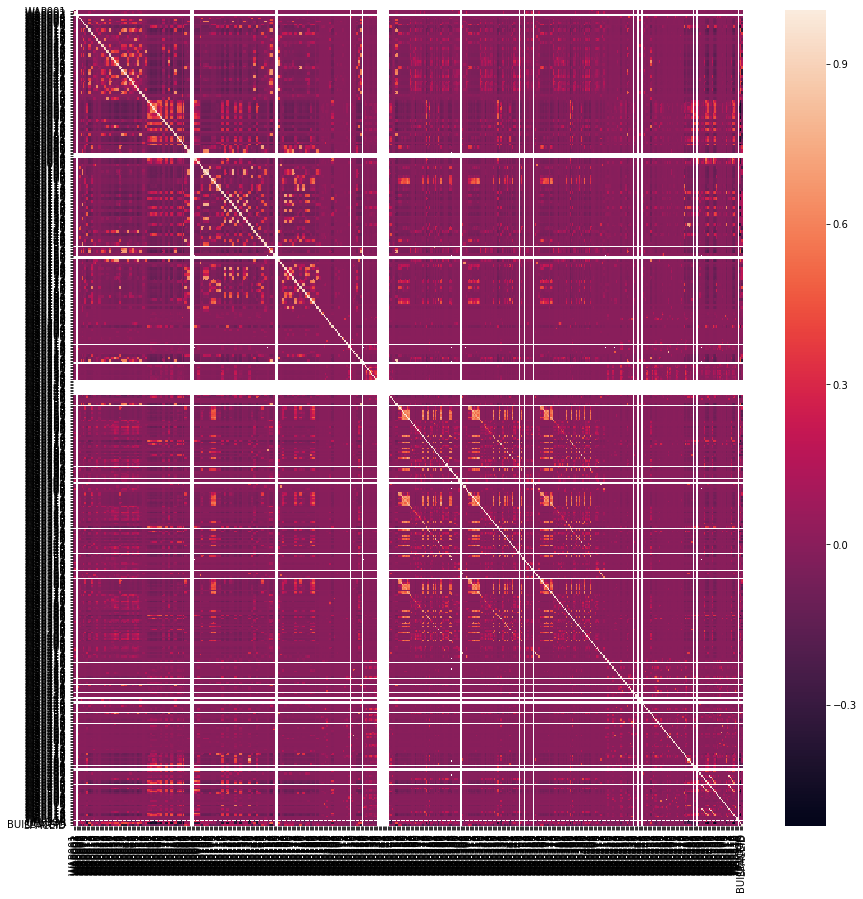

In [99]:
plt.figure(figsize=(15,15)) 
corr = rawData.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

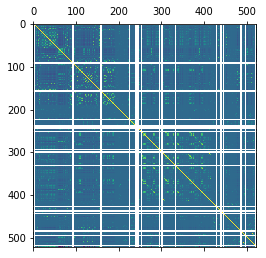

In [127]:
plt.matshow(rawData.corr())

In [181]:
rawData.corr()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,FLOOR,BUILDINGID,SPACEID
WAP001,1.000000,-0.000928,NaN,NaN,-0.001348,-0.003762,-0.005184,0.004170,-0.005263,-0.001990,...,-0.002396,0.030199,-0.012692,-0.016281,-0.000999,-0.000369,NaN,-0.025719,0.043761,0.016777
WAP002,-0.000928,1.000000,NaN,NaN,-0.001385,-0.003865,-0.005326,-0.005782,-0.005408,-0.002044,...,-0.002462,-0.001696,-0.013040,-0.016727,-0.001026,-0.000379,NaN,-0.021374,0.044959,-0.035616
WAP003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WAP004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WAP005,-0.001348,-0.001385,NaN,NaN,1.000000,-0.005610,-0.007731,-0.008393,-0.007850,-0.002968,...,-0.003574,-0.002463,0.017120,0.044639,-0.001490,-0.000550,NaN,-0.042142,-0.042362,0.008474


In [ ]:
5249*.7, 3500/5249, 3600/5249

# Train / Test Sets

In [160]:
# Set training set for X variables (Feature Space: X Training)
X_train = (features[:8000])
X_train_count = len(X_train.index)
print('The number of observations in the features training set is',str(X_train_count))
X_train.head()

The number of observations in the features training set is 8000


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP510,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
2,100,100,100,100,100,100,100,-97,100,100,...,100,100,100,100,100,100,100,100,100,100
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [159]:
# Set training set for y variable (Independent Variable)
# Dependent Variable Training Set (y Training)

y_train = depVar[: 8000]
y_train_count = len(y_train.index)
print('The number of observations in the y training set is',str(y_train_count))
y_train.head()

The number of observations in the y training set is 8000


0    106
1    106
2    103
3    102
4    122
Name: SPACEID, dtype: int64

In [164]:
# Set testing set for X variable (Feature Space: X Testing)

X_test = depVar[-3000:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is 3000
16937    212
16938    211
16939    210
16940    209
16941    216
Name: SPACEID, dtype: int64


In [162]:
8000*.4

3200.0

In [163]:
# Establish Ground Truth
y_test = depVar[-3000: ]
y_test_count = len(y_test.index)
print('The number of observations in the y testing set is',str(y_test_count))
print(y_test.head())

The number of observations in the y testing set is 3000
16937    212
16938    211
16939    210
16940    209
16941    216
Name: SPACEID, dtype: int64


In [ ]:
"""# Replace out of range values with NaN
X_train = X_train.replace(to_replace = 100, value = np.nan)
X_test = X_test.replace(to_replace = 100, value = np.nan) """

In [ ]:
"""X_stack = X_train.stack(dropna = False)
sns.distplot(X_stack.dropna(), kde = False)"""

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = .30, random_state = 0)

In [166]:
X_train.shape, X_test.shape

((5600, 519), (2400, 519))

In [167]:
y_train.shape, y_test.shape

((5600,), (2400,))

# Build Models

In [182]:
# Models
modelKNN = KNeighborsClassifier()
modelRF = RandomForestClassifier()
modelSVC = SVC()
modelLR = LinearRegression()
modelLDA = LinearDiscriminantAnalysis()

In [138]:
print('Summary of features sample:')
features.head()

Summary of features sample:


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP510,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
2,100,100,100,100,100,100,100,-97,100,100,...,100,100,100,100,100,100,100,100,100,100
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [139]:
# Print dependent variable
depVar[0:5,]

0    106
1    106
2    103
3    102
4    122
Name: SPACEID, dtype: int64

In [168]:
# Fit models
modelKNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [169]:
modelRF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [170]:
modelSVC.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [183]:
modelLR = LinearRegression()

In [184]:
modelLDA = LinearDiscriminantAnalysis()

In [171]:
# Model fitting - KNN
modelKNN.fit(X_train, y_train)
print(cross_val_score(modelKNN, X_train, y_train))
modelKNN.score(X_train, y_train)

C:\Users\Christy McCanless\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


[0.54902989 0.56514745 0.54376368]


0.7655357142857143

In [173]:
# Model fitting - RF
modelRF.fit(X_train, y_train)
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train, y_train)

C:\Users\Christy McCanless\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


[0.67121133 0.65093834 0.64824945]


0.9919642857142857

In [174]:
# Model fitting - SVC
modelSVC.fit(X_train, y_train)
print(cross_val_score(modelSVC, X_train, y_train))
modelSVC.score(X_train, y_train)

C:\Users\Christy McCanless\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


[0.14053487 0.14262735 0.15207877]


0.9871428571428571

In [185]:
# Model fitting - LR
modelLR.fit(X_train, y_train)
print(cross_val_score(modelLR, X_train, y_train))
modelLR.score(X_train, y_train)

[-1.49089205e+16 -1.93342883e+16 -6.40311585e+17]


0.8688755843963986

In [186]:
# Model fitting - LDA
modelLDA.fit(X_train, y_train)
print(cross_val_score(modelLDA, X_train, y_train))
modelLDA.score(X_train, y_train)

C:\Users\Christy McCanless\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\Christy McCanless\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Christy McCanless\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Christy McCanless\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\Christy McCanless\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Christy McCanless\Anacond

[0.41688516 0.4155496  0.41083151]


C:\Users\Christy McCanless\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.5957142857142858

# Make Predictions

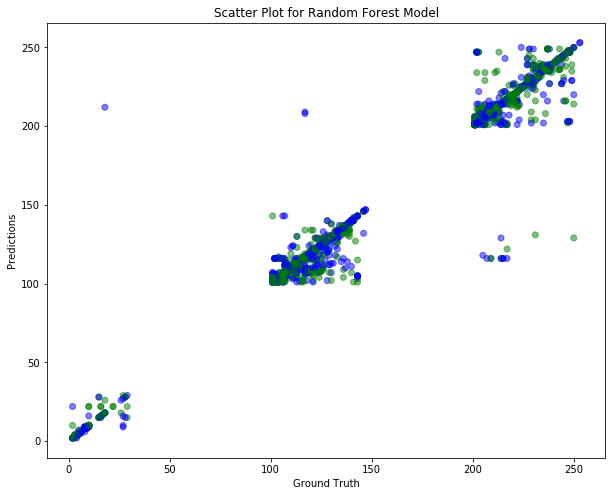

In [187]:
plt.scatter(y_test, predictions, color = ['blue', 'green'], alpha = .5)
plt.title('Scatter Plot for Random Forest Model')
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show()

In [176]:
# Make predictions - RF
predictions = modelRF.predict(X_test)
predAccuracy = accuracy_score(y_test, predictions)
predKappa = cohen_kappa_score(y_test, predictions)
print(classification_report(y_test, predictions))
print('Random Forest Metrics:')
print('Accurancy: %.3f' % predAccuracy)
print('Kappa: %.3f' % predKappa)

             precision    recall  f1-score   support

          2       0.77      0.91      0.83        11
          3       0.73      0.89      0.80         9
          4       0.64      0.90      0.75        10
          5       1.00      0.75      0.86        12
          6       0.88      1.00      0.93         7
          7       0.50      0.50      0.50         2
          8       0.82      0.82      0.82        11
          9       0.62      0.73      0.67        11
         10       0.97      0.93      0.95        30
         15       1.00      0.67      0.80         6
         16       0.83      0.83      0.83         6
         17       1.00      0.67      0.80         3
         18       0.83      0.71      0.77         7
         22       1.00      0.50      0.67         2
         26       1.00      1.00      1.00         2
         27       1.00      0.20      0.33         5
         28       1.00      1.00      1.00         5
         29       0.38      1.00      0.55   

In [177]:
# Make predictions - SVC
predictions = modelSVC.predict(X_test)
predAccuracy = accuracy_score(y_test, predictions)
predKappa = cohen_kappa_score(y_test, predictions)

print(classification_report(y_test, predictions))
print('SVR Metrics:')
print('Accuracy: %.3f' % predAccuracy)
print('Kappa: %.3f' % predKappa)

             precision    recall  f1-score   support

          2       1.00      0.18      0.31        11
          3       0.00      0.00      0.00         9
          4       0.00      0.00      0.00        10
          5       0.00      0.00      0.00        12
          6       0.00      0.00      0.00         7
          7       0.00      0.00      0.00         2
          8       0.00      0.00      0.00        11
          9       1.00      0.09      0.17        11
         10       1.00      0.10      0.18        30
         15       0.00      0.00      0.00         6
         16       1.00      0.17      0.29         6
         17       0.00      0.00      0.00         3
         18       0.00      0.00      0.00         7
         22       1.00      0.50      0.67         2
         26       0.00      0.00      0.00         2
         27       0.00      0.00      0.00         5
         28       0.00      0.00      0.00         5
         29       0.00      0.00      0.00   

C:\Users\Christy McCanless\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [179]:
# Make predictions - KNN
predictions = modelKNN.predict(X_test)
predAccuracy = accuracy_score(y_test, predictions)
predKappa = cohen_kappa_score(y_test, predictions)

print(classification_report(y_test, predictions))
print('KNN Metrics:')
print('Accuracy: %.3f' % predAccuracy)
print('Kappa: %.3f' % predKappa)

             precision    recall  f1-score   support

          2       0.82      0.82      0.82        11
          3       0.83      0.56      0.67         9
          4       0.67      0.80      0.73        10
          5       0.82      0.75      0.78        12
          6       0.67      0.57      0.62         7
          7       0.50      1.00      0.67         2
          8       0.67      0.36      0.47        11
          9       0.47      0.82      0.60        11
         10       0.92      0.80      0.86        30
         15       0.57      0.67      0.62         6
         16       0.60      0.50      0.55         6
         17       1.00      1.00      1.00         3
         18       0.83      0.71      0.77         7
         22       0.25      1.00      0.40         2
         26       0.50      0.50      0.50         2
         27       1.00      0.20      0.33         5
         28       0.67      0.80      0.73         5
         29       0.50      0.33      0.40   

In [189]:
# Make predictions - LDA
predictions = modelLDA.predict(X_test)
predAccuracy = accuracy_score(y_test, predictions)
predKappa = cohen_kappa_score(y_test, predictions)

print(classification_report(y_test, predictions))
print('LDA Metrics:')
print('Accuracy: %.3f' % predAccuracy)
print('Kappa: %.3f' % predKappa)

             precision    recall  f1-score   support

          2       0.86      0.55      0.67        11
          3       0.56      0.56      0.56         9
          4       0.40      0.40      0.40        10
          5       1.00      0.58      0.74        12
          6       0.67      0.57      0.62         7
          7       0.18      1.00      0.31         2
          8       0.47      0.73      0.57        11
          9       0.57      0.36      0.44        11
         10       0.83      0.50      0.62        30
         15       0.80      0.67      0.73         6
         16       0.31      0.83      0.45         6
         17       1.00      0.67      0.80         3
         18       0.75      0.43      0.55         7
         22       0.40      1.00      0.57         2
         26       1.00      1.00      1.00         2
         27       1.00      0.60      0.75         5
         28       0.62      1.00      0.77         5
         29       0.20      0.33      0.25   

C:\Users\Christy McCanless\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
